<h2>Dataset: Boston Housing Data</h2>

<p><b>Dependent Variable: MEDV:</b> Median value of owner-occupied homes in 1000's of dollars
<p><b>Explanatory Variables</b></p>
<p><b>CRIM:</b> per capita crime rate by town
<p><b>ZN:</b> proportion of residential land zoned for lots over 25,000 sq.ft.
<p><b>INDUS:</b> proportion of non-retail business acres per town
<p><b>CHAS:</b> Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
<p><b>NOX:</b> nitric oxides concentration (parts per 10 million)
<p><b>RM:</b> average number of rooms per dwelling
<p><b>AGE:</b> proportion of owner-occupied units built prior to 1940
<p><b>DIS:</b> weighted distances to five Boston employment centres
<p><b>RAD:</b> index of accessibility to radial highways
<p><b>TAX:</b> full-value property-tax rate per 10,000 dollars
<p><b>PTRATIO:</b>  pupil-teacher ratio by town
<p><b>B:</b> 1000(Bk - 0.63)^2 where Bk is the proportion of black residents by town
<p><b>LSTAT:</b> lower status of the population


# Load Necessary Libraries

In [22]:

from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
%matplotlib inline
#create Pipeline in insite PCA and StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
# metrics model
from sklearn.metrics import mean_squared_error

In [21]:
#load data
#boston dataset come with sklearn
boston_data=load_boston()


In [26]:
print(boston_data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [63]:
#print(boston_data.target)

In [23]:
#change data to dataframe
boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston['MEDV'] = boston_data.target
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [24]:
#save to csv
data=boston.to_csv("Boston.csv",index=False)

In [29]:
#split data to test and train
test,train = train_test_split(boston,test_size=0.25, random_state=42)

In [30]:
d_train=pd.read_csv('train.csv')
d_test=pd.read_csv('test.csv')

In [4]:
d_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.955363,10.748588,11.005056,0.062147,0.553903,6.308983,68.521186,3.835146,9.675141,407.364407,18.562712,359.999294,12.444153,22.447175
std,9.721351,22.040853,6.861730,0.241764,0.113276,0.687214,28.018038,2.152309,8.738512,170.376337,2.120270,87.404935,6.895798,9.166320
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,0.082045,0.000000,5.130000,0.000000,0.450000,5.888000,44.550000,2.110100,4.000000,279.000000,17.400000,376.602500,6.757500,16.800000
50%,0.251680,0.000000,8.560000,0.000000,0.538000,6.221000,76.800000,3.190950,5.000000,330.000000,19.100000,391.765000,11.360000,21.100000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.640250,93.975000,5.276650,24.000000,666.000000,20.200000,396.210000,16.717500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [10]:
#infromation in data what is type in dtypes
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 14 columns):
CRIM       354 non-null float64
ZN         354 non-null float64
INDUS      354 non-null float64
CHAS       354 non-null float64
NOX        354 non-null float64
RM         354 non-null float64
AGE        354 non-null float64
DIS        354 non-null float64
RAD        354 non-null float64
TAX        354 non-null float64
PTRATIO    354 non-null float64
B          354 non-null float64
LSTAT      354 non-null float64
MEDV       354 non-null float64
dtypes: float64(14)
memory usage: 38.8 KB


In [26]:
d_train.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# data visualization

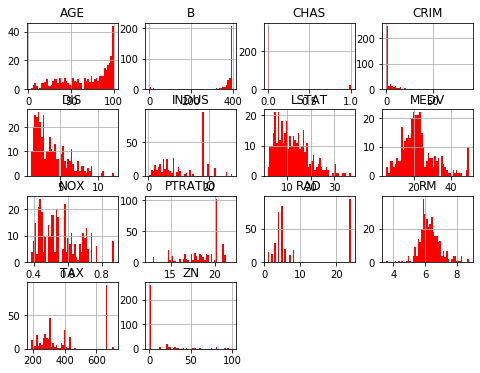

In [30]:
d_train.hist(bins=50,figsize=(8,6),color="r")
plt.show()

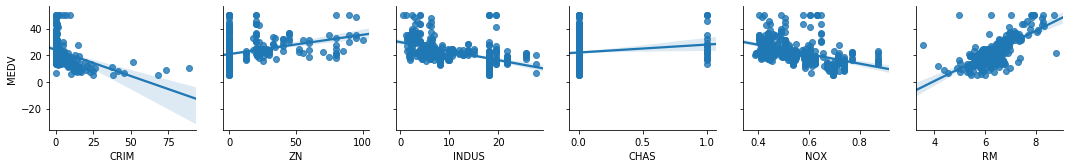

In [15]:
q=["CRIM","ZN","INDUS","CHAS","NOX","RM"]
sns.pairplot(x_vars=q,y_vars="MEDV",data=d_train,kind="reg")

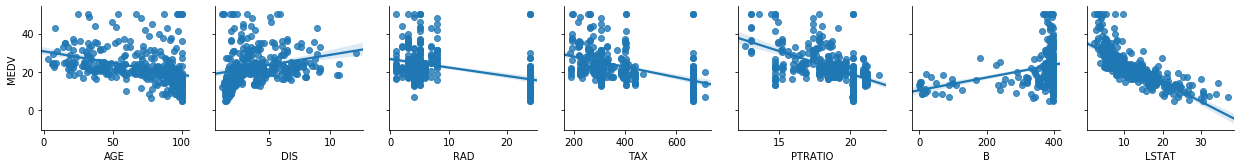

In [18]:
u=["AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
sns.pairplot(x_vars=u,y_vars="MEDV",data=d_train,kind="reg")

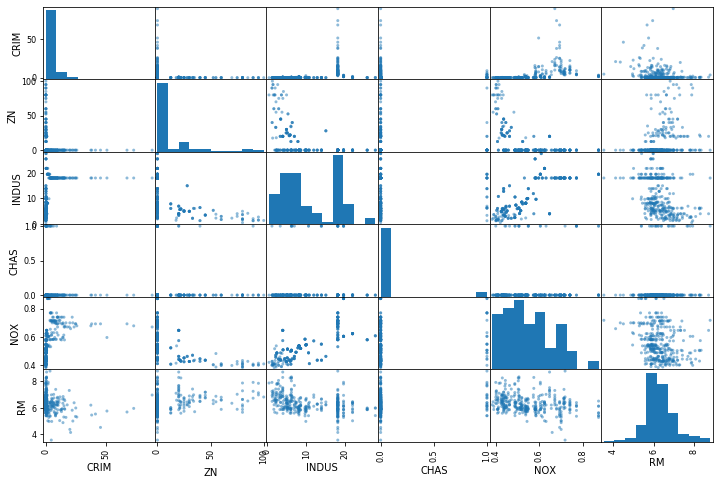

In [7]:
e=["CRIM","ZN","INDUS","CHAS","NOX","RM"]
i=["AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]

from pandas.plotting import scatter_matrix
attributes = e
scatter_matrix(d_train[e], figsize=(12, 8))
plt.show()

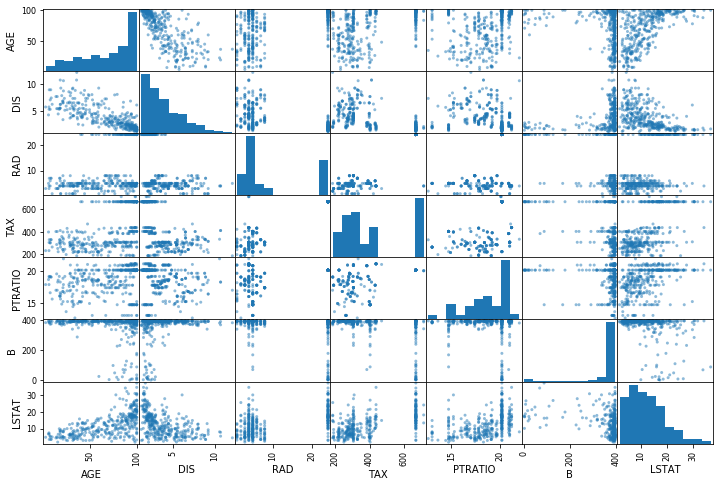

In [8]:
from pandas.plotting import scatter_matrix
attributes = i
scatter_matrix(d_train[i], figsize=(12, 8))
plt.show()

In [27]:
corr_matrix = d_train.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.194611,0.401409,-0.053444,0.430969,-0.205340,0.341379,-0.371016,0.609101,0.568755,0.278452,-0.371659,0.474454,-0.414493
ZN,-0.194611,1.000000,-0.518741,-0.035337,-0.514683,0.284361,-0.562679,0.666855,-0.312085,-0.312299,-0.385314,0.163978,-0.403867,0.347749
INDUS,0.401409,-0.518741,1.000000,0.075425,0.765655,-0.377557,0.622977,-0.691503,0.611642,0.728819,0.390712,-0.328729,0.615199,-0.504066
CHAS,-0.053444,-0.035337,0.075425,1.000000,0.113685,0.125704,0.084618,-0.100747,0.014947,-0.011005,-0.138600,0.060750,-0.058846,0.156929
NOX,0.430969,-0.514683,0.765655,0.113685,1.000000,-0.264694,0.739821,-0.764700,0.662153,0.704433,0.230427,-0.360005,0.600959,-0.436513
RM,-0.205340,0.284361,-0.377557,0.125704,-0.264694,1.000000,-0.205562,0.163553,-0.209869,-0.289468,-0.376644,0.127164,-0.591629,0.705879
AGE,0.341379,-0.562679,0.622977,0.084618,0.739821,-0.205562,1.000000,-0.751391,0.455811,0.499939,0.271347,-0.248418,0.616312,-0.371834
DIS,-0.371016,0.666855,-0.691503,-0.100747,-0.764700,0.163553,-0.751391,1.000000,-0.497793,-0.529719,-0.222886,0.264047,-0.498380,0.245816
RAD,0.609101,-0.312085,0.611642,0.014947,0.662153,-0.209869,0.455811,-0.497793,1.000000,0.912933,0.448018,-0.411284,0.535096,-0.419712
TAX,0.568755,-0.312299,0.728819,-0.011005,0.704433,-0.289468,0.499939,-0.529719,0.912933,1.000000,0.461900,-0.408741,0.587457,-0.502600


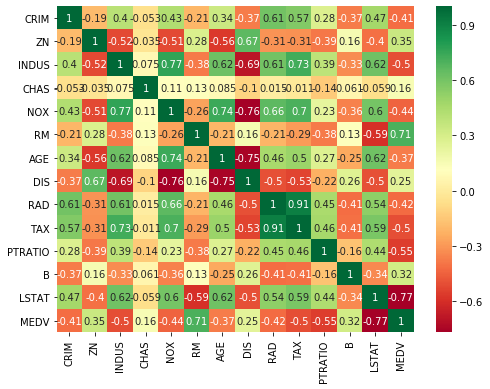

In [9]:
import seaborn as sns
#get correlations of each features in dataset
corr_matrix = d_train.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(8,6))
#plot heat map
g=sns.heatmap(d_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Feature Enginering

In [5]:
x=d_train[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]]
y=d_train["MEDV"]

In [7]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based Regressors

[0.039206   0.01238294 0.01279154 0.006781   0.10246427 0.30080362
 0.01351878 0.02252217 0.01126052 0.05040146 0.04805245 0.01230044
 0.36751481]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


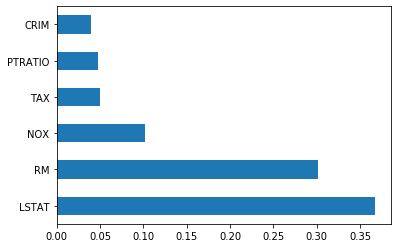

In [8]:
#use features importances
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [6]:
X=d_train[["LSTAT","RM","PTRATIO","INDUS","TAX","NOX"]]
y=d_train["MEDV"]
#split data to train and test
# recall from sklearn.model_selection import train_test_split in sklearn
# split data to trian 75% and test 25% random_state=42
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

# Build model use K Neighbors Regression

In [18]:
#Comparing between different algorithms
#Use Pipeline and StandardScaler and PCA

pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=6)),
                     ('lr_Regression',LinearRegression())])

pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=6)),
                     ('tree_Regressorr',DecisionTreeRegressor())])

pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=6)),
                     ('rf_Regressorr',RandomForestRegressor())])


pipeline_knn=Pipeline([('scalar4',StandardScaler()),
                     ('pca4',PCA(n_components=6)),
                     ('knn_Regressor',KNeighborsRegressor(n_neighbors=4,leaf_size=1,p=1))])


pipeline_svm=Pipeline([('scalar5',StandardScaler()),
                     ('pca5',PCA(n_components=6)),
                     ('svm_Regression',LinearSVR())])

In [8]:
## LEts make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest,pipeline_knn,pipeline_svm]
best_accuracy=0.0
best_Regression=0
best_pipeline=""
# Dictionary of pipelines and Regressor types for ease of reference
pipe_dict = {0: 'Liner Regression', 1: 'Decision Tree', 2: 'RandomForest',3:"KNeighbors",4:'SVM'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(x_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [9]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(x_test,y_test)))

Liner Regression Test Accuracy: 0.794772508380566
Decision Tree Test Accuracy: 0.604124847221607
RandomForest Test Accuracy: 0.7836735067061876
KNeighbors Test Accuracy: 0.8777476355639728
SVM Test Accuracy: 0.8109941615994812


In [10]:
for i,model in enumerate(pipelines):
     if model.score(x_test,y_test)>best_accuracy:
        best_accuracy=model.score(x_test,y_test)
        best_pipeline=model
        best_Regression=i
print('Regression with best accuracy:{}'.format(pipe_dict[best_Regression]))

Regression with best accuracy:KNeighbors


In [128]:
# use GridSearchCV to select best KNeighborsRegressor
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 =KNeighborsRegressor()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 4


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [19]:
from sklearn.neighbors import KNeighborsRegressor
knn=pipeline_knn
knn.fit(x_train,y_train)
#predict x_test values
pred=knn.predict(x_test)
#print accuracy for algorithm
print("Accuracy for KNeighbors  data: ",knn.score(x_test,y_test))

Accuracy for KNeighbors  data:  0.8777476355639728


In [22]:
from sklearn.metrics import mean_squared_error
pred= knn.predict(x_test)
knn_mse = mean_squared_error(y_test,pred)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

3.381555223611922

In [122]:
test=d_test[["LSTAT","RM","PTRATIO","INDUS","TAX","NOX"]]
op_knn=knn.predict(test)
op=pd.DataFrame(test)
op["MEDV"]=op_knn
op.head(20)

,LSTAT,RM,PTRATIO,INDUS,TAX,NOX,MEDV
0,4.67,6.290,16.1,3.37,337.0,0.398,24.700
1,10.87,5.891,18.6,10.59,277.0,0.489,22.500
2,11.72,6.023,18.4,9.90,304.0,0.544,21.350
3,19.31,6.417,20.2,18.10,666.0,0.713,12.950
4,30.81,5.399,17.9,6.91,233.0,0.448,14.750
5,7.39,6.549,16.0,13.92,289.0,0.437,24.325
6,21.32,6.003,20.2,18.10,666.0,0.584,14.825
7,21.46,6.164,17.4,6.20,307.0,0.507,19.550
8,5.50,7.007,17.8,3.41,270.0,0.489,33.725
9,27.26,5.613,19.1,25.65,188.0,0.581,19.500


In [34]:
data=pd.read_csv('Boston.csv')
p=data[["LSTAT","RM","PTRATIO","INDUS","TAX","NOX","MEDV"]]
p[p.LSTAT==3.33]

,LSTAT,RM,PTRATIO,INDUS,TAX,NOX,MEDV
290,3.33,6.861,19.2,4.95,245.0,0.411,28.5
